<a href="https://colab.research.google.com/github/andtoo14/Data-Science/blob/main/Andrew_casestudy_data_cleaning_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

In [20]:
path = '/content/sierra-leone_power_source_2023-2024.csv'
data = pd.read_csv(path)

/tmp/ipython-input-1197893031.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


In [21]:
data.shape

(7982001, 8)

In [22]:
#we want to see the columns available
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982001 entries, 0 to 7982000
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   respondent_id     object 
 2   room              object 
 3   hospital          object 
 4   voltage           float64
 5   frequency         float64
 6   power_source      object 
 7   power_source_est  object 
dtypes: float64(2), object(6)
memory usage: 487.2+ MB


In [23]:
#seeing a specific column
data['voltage']

,voltage
0,221.357850
1,221.357850
2,221.357850
3,217.114569
4,219.943423
...,...
7981996,235.502122
7981997,240.452617
7981998,232.673267
7981999,231.966054


In [24]:
data.dropna(inplace=True)
data.isnull().sum()

,0
time,0
respondent_id,0
room,0
hospital,0
voltage,0
frequency,0
power_source,0
power_source_est,0


In [25]:
data['time'] = pd.to_datetime(data['time'])
display(data['time'].head())

,time
0,2023-07-22 20:42:03
1,2023-07-23 06:58:03
2,2023-07-23 13:46:03
3,2023-07-23 23:34:03
4,2023-07-24 00:18:03


In [26]:
categorical_columns = ['room', 'hospital', 'power_source', 'power_source_est']
for col in categorical_columns:
    print(f"Unique values in column '{col}':")
    print(data[col].unique())
    print("\n")

Unique values in column 'room':
['Main drug store - Solar w/Grid Backup'
 'X-Ray Department Office - Grid w/Generator Backup'
 'Medical Superintendent Office  - Solar & Generator'
 'Step down ward two - Grid w/Solar & Generator Backup'
 'High Denpendency Unit - Solar w/Grid Backup'
 'Operation theatre - Solar & Generator'
 'SBCU Ward - Grid w/Generator Backup' 'Special Baby Care ward - Solar'
 'X-Ray room - Solar & Generator' 'SCBU WARD - Solar'
 'Power Change Over Room - Grid'
 'Pharmacist Office - Grid w/Generator Backup'
 'Antenatal room - Solar w/Grid Backup'
 'Delivery room nurses station - Grid'
 'Main Operating Theatre Room - Grid w/Generator Backup'
 'Male ward - Solar & Generator'
 'HOD Maintenance Office - Grid w/Solar Backup'
 'Ward 2 - Grid w/Solar Backup' 'HOD (Office) - Solar w/Grid Backup'
 'Maintenance Office  - Grid w/Solar & Generator Backup'
 'Administration Building - Solar & Generator'
 'HDU - Grid w/Solar & Generator Backup'
 'Main Theatre (Drug Store) - Grid w/Ge

In [27]:
data.head(5)

,time,respondent_id,room,hospital,voltage,frequency,power_source,power_source_est
0,2023-07-22 20:42:03,BBFDA35A,Main drug store - Solar w/Grid Backup,hastings,221.357850,99.940036,Solar w/Grid Backup,unknown
1,2023-07-23 06:58:03,BBFDA35A,Main drug store - Solar w/Grid Backup,hastings,221.357850,99.790440,Solar w/Grid Backup,unknown
2,2023-07-23 13:46:03,BBFDA35A,Main drug store - Solar w/Grid Backup,hastings,221.357850,99.920064,Solar w/Grid Backup,unknown
3,2023-07-23 23:34:03,BBFDA35A,Main drug store - Solar w/Grid Backup,hastings,217.114569,49.957536,Solar w/Grid Backup,solar
4,2023-07-24 00:18:03,BBFDA35A,Main drug store - Solar w/Grid Backup,hastings,219.943423,50.017506,Solar w/Grid Backup,solar


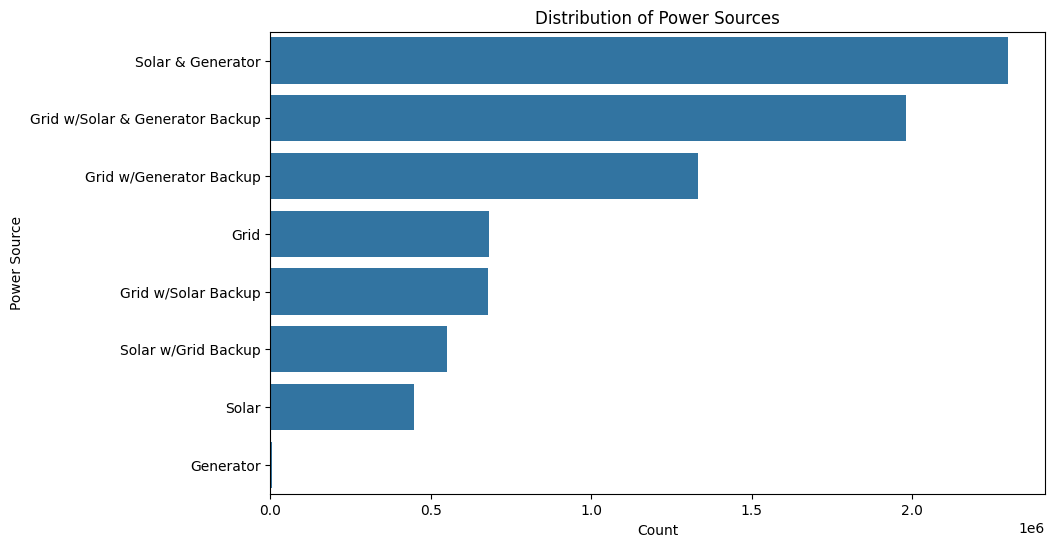

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='power_source', order = data['power_source'].value_counts().index)
plt.title('Distribution of Power Sources')
plt.xlabel('Count')
plt.ylabel('Power Source')
plt.show()

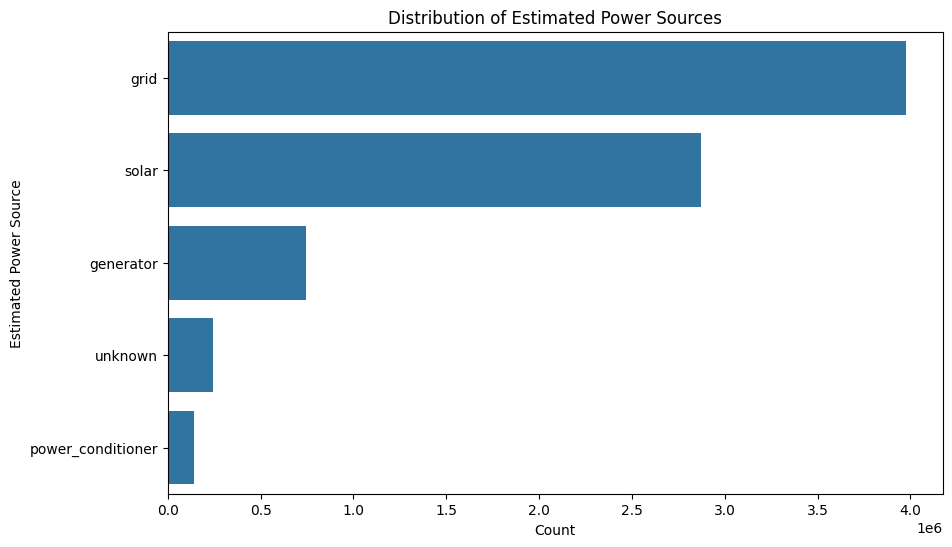

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='power_source_est', order = data['power_source_est'].value_counts().index)
plt.title('Distribution of Estimated Power Sources')
plt.xlabel('Count')
plt.ylabel('Estimated Power Source')
plt.show()

# Task
Analyze the provided power outage dataset to identify patterns and relationships between different variables, focusing on power source characteristics, temporal trends, and hospital-specific variations. Visualize the findings to illustrate key insights.

## Compare `power source` and `power source est`

### Subtask:
Visualize the relationship between the reported and estimated power sources to understand where they align and differ.


**Reasoning**:
Create a contingency table and then a stacked bar plot to visualize the relationship between `power_source` and `power_source_est`.



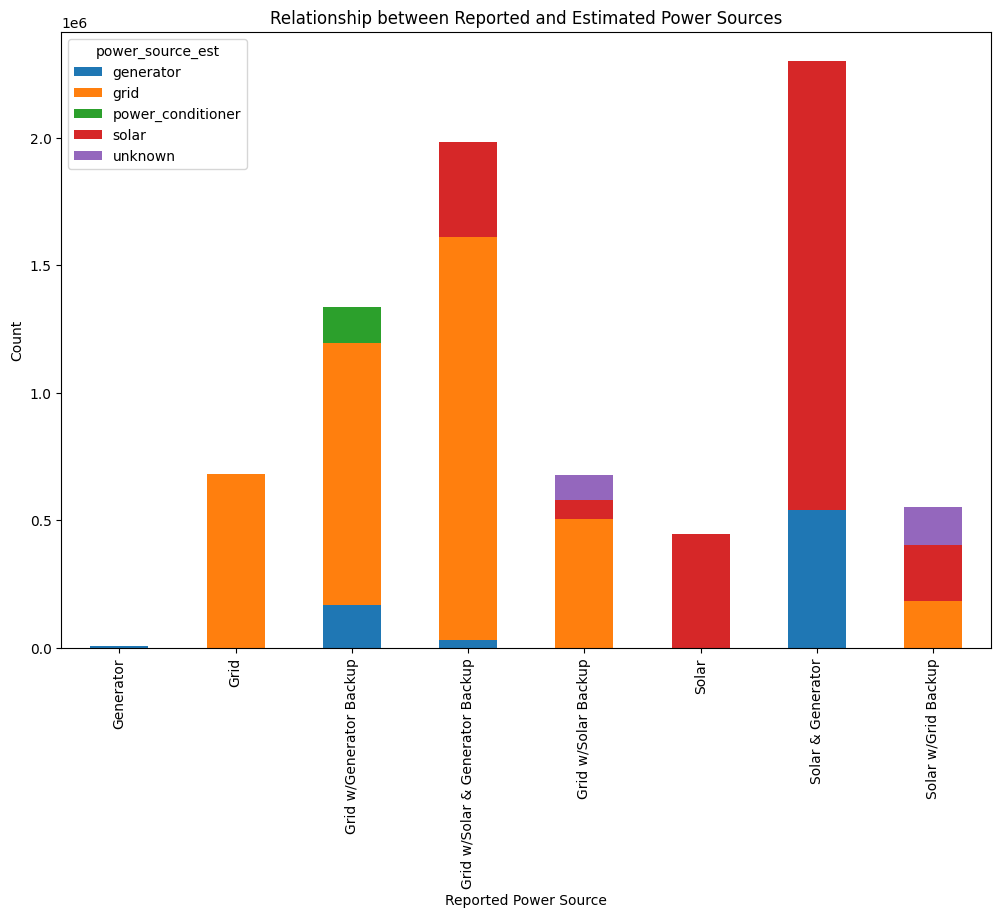

In [30]:
contingency_table = pd.crosstab(data['power_source'], data['power_source_est'])

contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Relationship between Reported and Estimated Power Sources')
plt.xlabel('Reported Power Source')
plt.ylabel('Count')
plt.show()

## Analyze power source usage over time

### Subtask:
Plot the frequency of different power sources over time to identify trends or seasonal patterns.


**Reasoning**:
Group the data by time, resample to daily frequency, count power sources, unstack, and then plot the results to visualize trends over time.



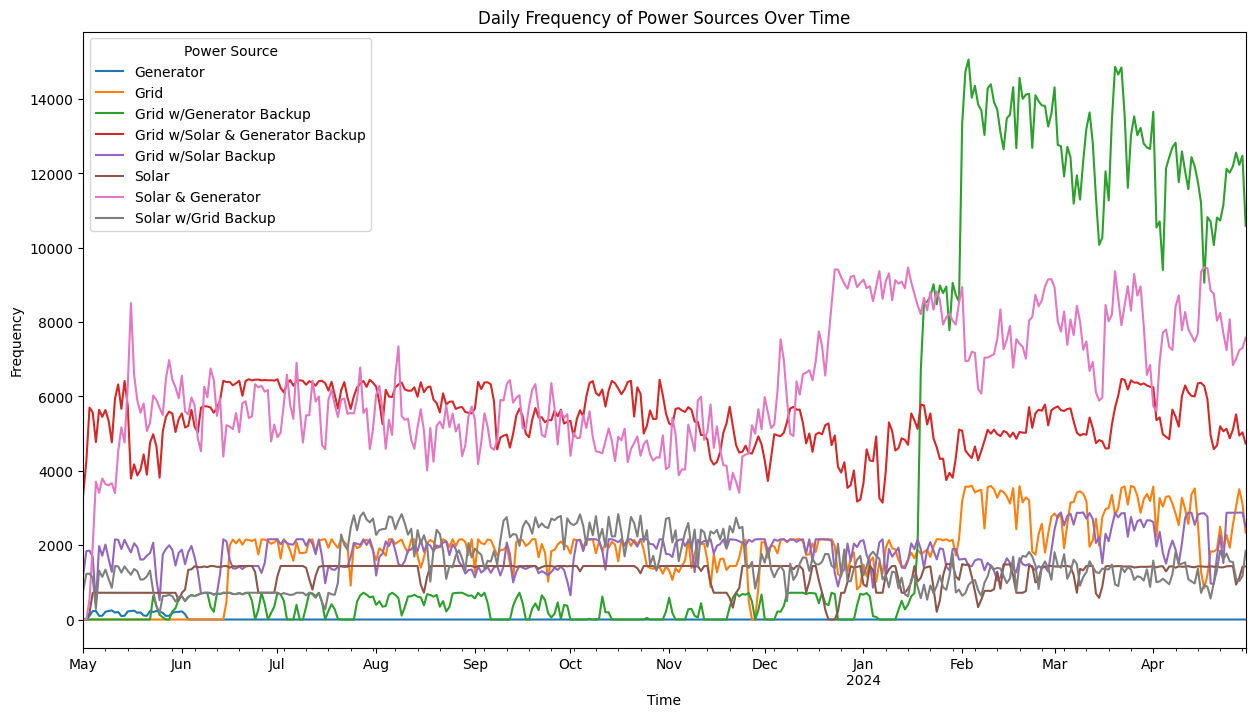

In [31]:
daily_power_source_frequency = data.groupby(pd.Grouper(key='time', freq='D'))['power_source'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
daily_power_source_frequency.plot(kind='line', ax=plt.gca())
plt.title('Daily Frequency of Power Sources Over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend(title='Power Source')
plt.show()

## Examine voltage and frequency characteristics

### Subtask:
Analyze voltage and frequency data in relation to different power sources to see if there are distinct patterns.


**Reasoning**:
Create box plots for 'voltage' and 'frequency' grouped by 'power_source' to visualize their distributions.



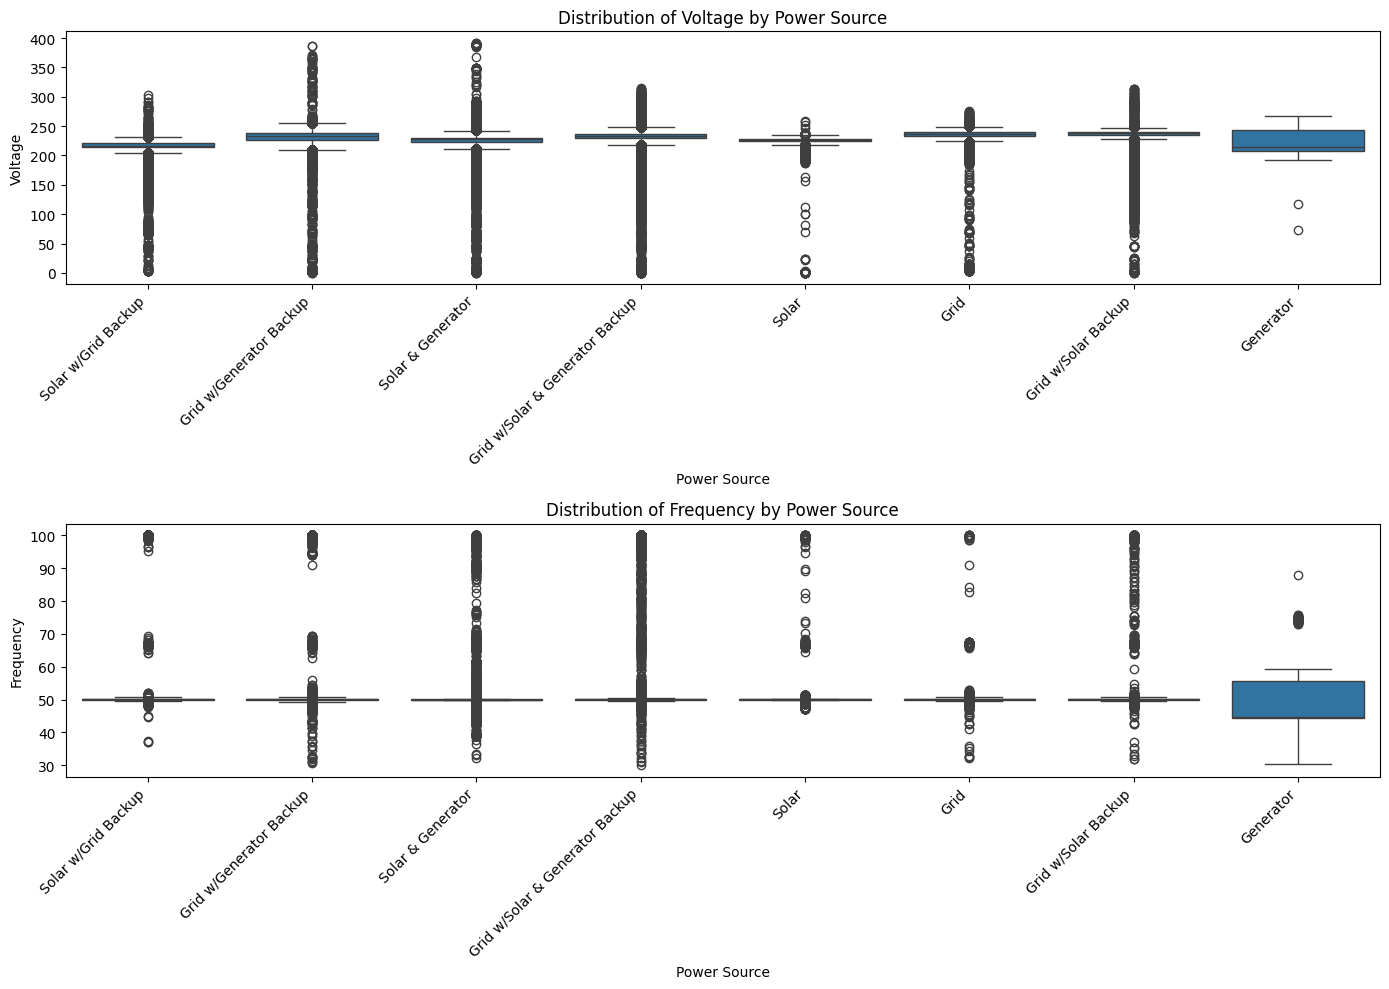

In [32]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
sns.boxplot(data=data, x='power_source', y='voltage')
plt.title('Distribution of Voltage by Power Source')
plt.xlabel('Power Source')
plt.ylabel('Voltage')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 1, 2)
sns.boxplot(data=data, x='power_source', y='frequency')
plt.title('Distribution of Frequency by Power Source')
plt.xlabel('Power Source')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Visualize power source distribution by hospital

### Subtask:
Create visualizations to compare the power source mix across different hospitals.


**Reasoning**:
Create a bar plot to compare power source distribution across hospitals using seaborn.



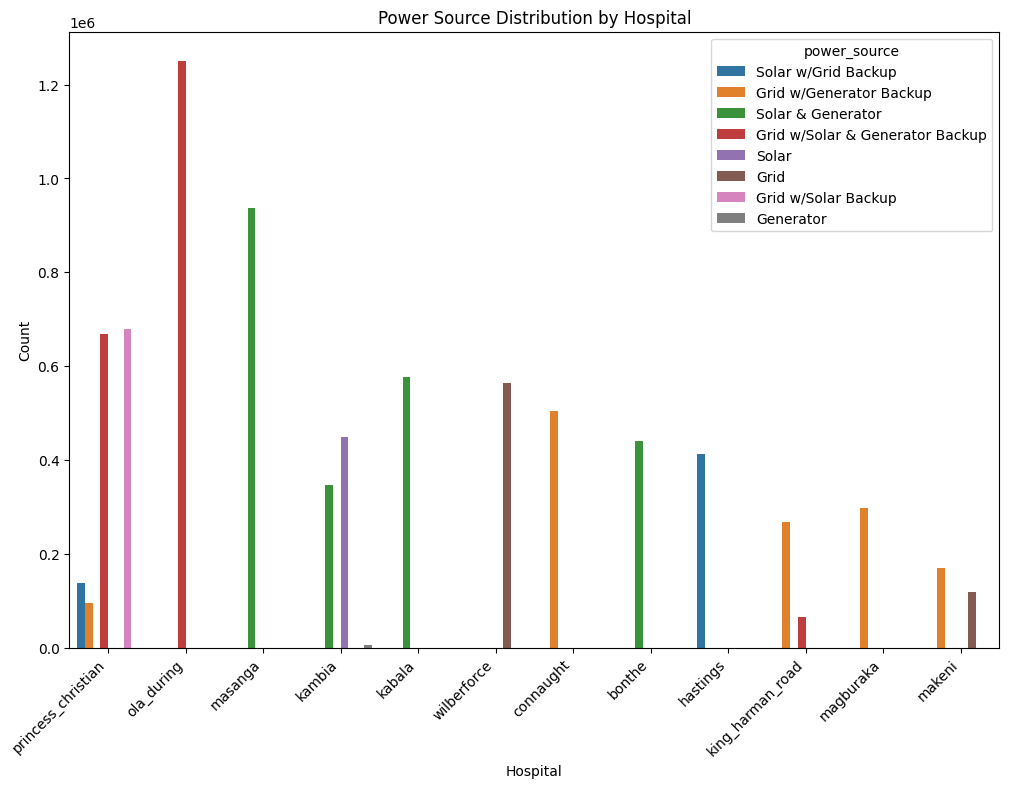

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='hospital', hue='power_source', order = data['hospital'].value_counts().index)
plt.title('Power Source Distribution by Hospital')
plt.xlabel('Hospital')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Summarize findings

### Subtask:
Provide a summary of the key insights gained from the analysis and visualizations.


**Reasoning**:
Compile the key observations from the previous analysis and visualizations into a concise summary.



In [34]:
print("Summary of Key Insights:")
print("\nRelationship between Reported and Estimated Power Sources:")
print("The contingency table and stacked bar plot revealed both agreement and discrepancies between 'power_source' and 'power_source_est'. While there is overlap (e.g., 'Solar & Generator' often estimated as 'solar' or 'generator'), there are also notable differences and the presence of 'unknown' estimated sources for some reported sources.")

print("\nTrends and Seasonal Patterns in Power Source Usage:")
print("The line plot showing daily power source frequency over time indicates varying usage patterns for different power sources throughout the year. Some sources appear to be used more consistently, while others might show fluctuations, potentially related to time of day, weather, or grid availability. Specific trends or seasonal patterns would require closer inspection of the plot.")

print("\nVoltage and Frequency Characteristics by Power Source:")
print("The box plots of voltage and frequency by power source demonstrate distinct characteristics. Different power sources exhibit different distributions of voltage and frequency, suggesting variations in the quality or stability of power supplied. For instance, some sources might have tighter voltage ranges, while others show wider variations or different typical frequency values.")

print("\nPower Source Distribution Across Hospitals:")
print("The grouped bar plot illustrating power source distribution by hospital shows that each hospital has a unique mix of power sources. Some hospitals rely predominantly on a specific source or combination, while others have a more diverse energy portfolio. This highlights the variability in infrastructure and power strategies across the different facilities.")

Summary of Key Insights:

Relationship between Reported and Estimated Power Sources:
The contingency table and stacked bar plot revealed both agreement and discrepancies between 'power_source' and 'power_source_est'. While there is overlap (e.g., 'Solar & Generator' often estimated as 'solar' or 'generator'), there are also notable differences and the presence of 'unknown' estimated sources for some reported sources.

Trends and Seasonal Patterns in Power Source Usage:
The line plot showing daily power source frequency over time indicates varying usage patterns for different power sources throughout the year. Some sources appear to be used more consistently, while others might show fluctuations, potentially related to time of day, weather, or grid availability. Specific trends or seasonal patterns would require closer inspection of the plot.

Voltage and Frequency Characteristics by Power Source:
The box plots of voltage and frequency by power source demonstrate distinct characteristic

## Summary:

### Data Analysis Key Findings

*   There is a mix of agreement and disagreement between the reported and estimated power sources. While some reported sources align with their estimated counterparts (e.g., 'Solar & Generator' often estimated as 'solar' or 'generator'), there are also notable differences and instances where the estimated source is 'unknown'.
*   The daily frequency of different power sources shows varying usage patterns over time. Some sources appear to be used more consistently, while others exhibit fluctuations, potentially influenced by factors like time of day, weather, or grid availability.
*   Voltage and frequency characteristics vary distinctly depending on the power source. Different power sources exhibit different distributions for voltage and frequency, suggesting differences in the stability or quality of the power supplied.
*   Each hospital has a unique distribution of power sources, indicating variability in infrastructure and power strategies across different facilities.

### Insights or Next Steps

*   Further investigation into the 'unknown' estimated power sources could provide valuable insights into data collection processes or reveal undocumented power backup systems.
*   Analyzing the temporal trends in power source usage in conjunction with external factors like weather data or grid status could help identify triggers for using specific backup power sources.
